In [48]:
import processing
import ds
import ml
import model_saving

In [2]:
filename = '/home/octo/Dropbox'+ '/SPY29Dec.csv'

In [3]:
data=processing.get_csv_pd(filename)
data=processing.BA(data)
data=processing.preprocessing(data)
data_km=ml.kalman_ma(data)
data['km']=data_km

In [4]:
data_km=ml.kalman_ma(data)

In [7]:
data['km']=data_km

In [51]:
import numpy as np
data['UD']=np.where(data.km>data.vwap,1,-1)

In [19]:
data[2009:2012]

,askPrice,askSize,bidPrice,bidSize,Open,Close,High,Low,Volume,vwap,Change,Flow,km,UD
2017-12-29 21:25:24.169818,267.600006,231.0,267.589996,4.0,267.595001,267.595001,267.649994,267.570007,235.0,267.599823,0.0,-227.0,267.588551,0
2017-12-29 21:25:24.293927,267.600006,231.0,267.589996,15.0,267.595001,267.595001,267.649994,267.570007,246.0,267.599396,0.0,-216.0,267.589164,0
2017-12-29 21:25:24.418088,267.600006,67.0,267.589996,15.0,267.595001,267.595001,267.649994,267.570007,82.0,267.598175,0.0,-52.0,267.589720,0


## Price Histogram

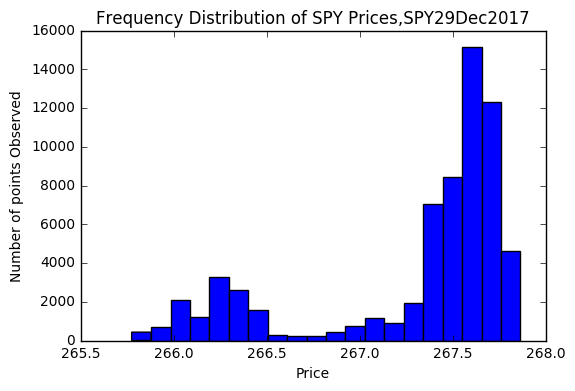

In [21]:
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt
# Plot a histogram using 20 bins
plt.hist(data.Open, bins=20)
plt.xlabel('Price')
plt.ylabel('Number of points Observed')
plt.title('Frequency Distribution of SPY Prices,SPY29Dec2017');
plt.show()

## Returns Histogram

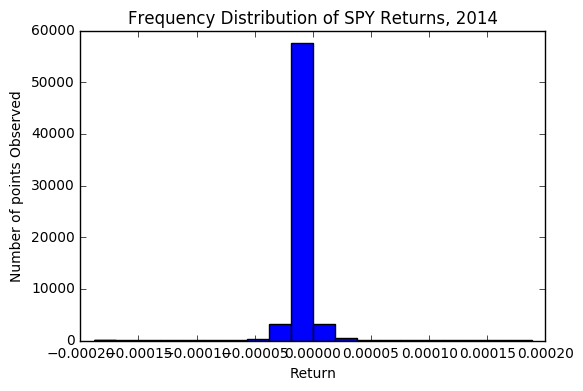

In [27]:
# Remove the first element because percent change from nothing to something is NaN
R = data.Open.pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of points Observed')
plt.title('Frequency Distribution of SPY Returns, 2014');
plt.show()

## Cumulative Histogram (Discrete Estimated CDF)

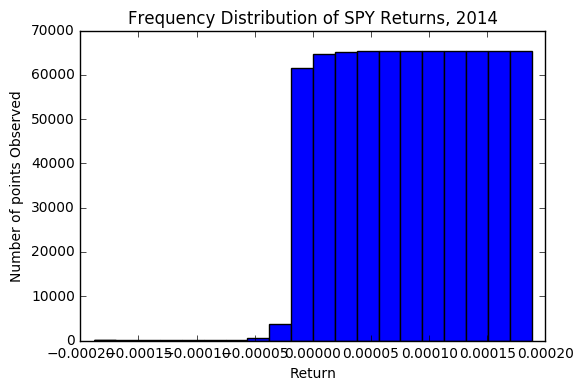

In [28]:
# Remove the first element because percent change from nothing to something is NaN
R = data.Open.pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of points Observed')
plt.title('Frequency Distribution of SPY Returns, 2014');
plt.show()

## Scatter plot

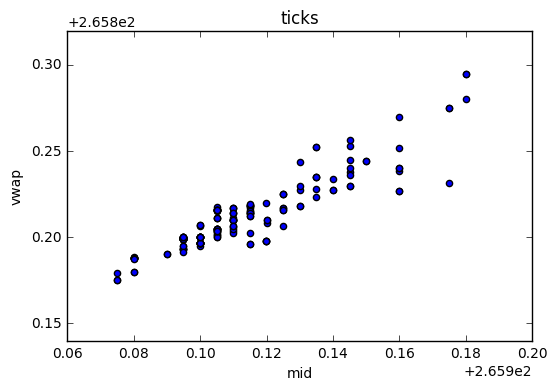

In [30]:
plt.scatter(data.Open.tail(200), data.vwap.tail(200))
plt.xlabel('mid')
plt.ylabel('vwap')
plt.title('ticks');
plt.show()

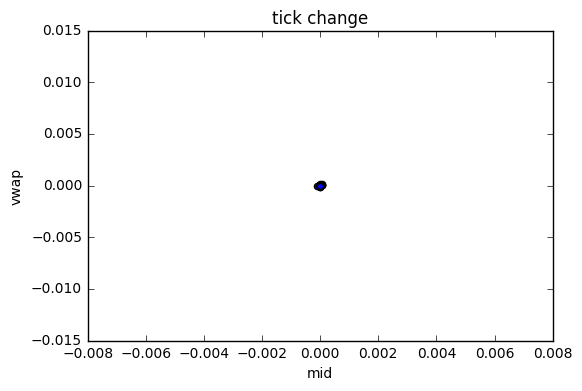

In [32]:
R_mid = data.Open.pct_change()[1:]
R_vwap = data.vwap.pct_change()[1:]

plt.scatter(R_mid.tail(200), R_vwap.tail(200))
plt.xlabel('mid')
plt.ylabel('vwap')
plt.title('tick change');
plt.show()

## Statistical Moments - Skewness and Kurtosis

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

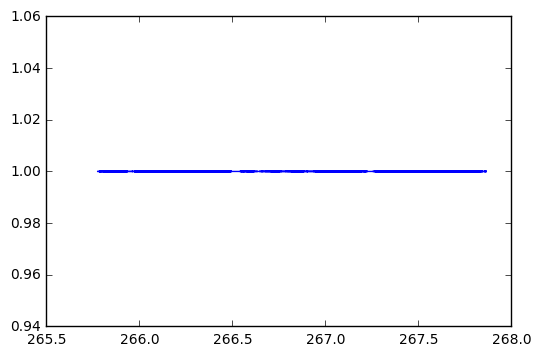

In [35]:
# Plot a normal distribution with mean = 0 and standard deviation = 2
normal = stats.norm.cdf(data.Open)
plt.plot(data.Open, normal);
plt.show()

Skew: -1.358830213546753
Mean: 267.2296142578125
Median: 267.535


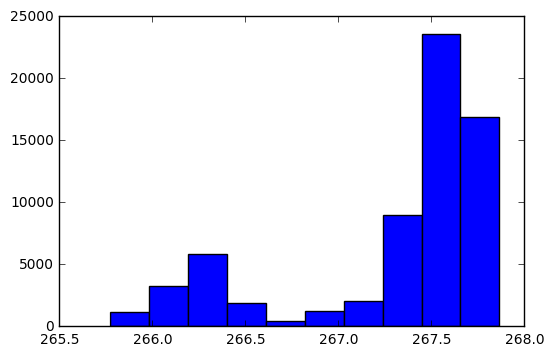

In [36]:
pricing = data.Open
returns = pricing.pct_change()[1:]

print('Skew:', stats.skew(pricing))
print('Mean:', np.mean(pricing))
print('Median:', np.median(pricing))

plt.hist(pricing, 10);
plt.show()

Skew: 0.09221028536558151
Mean: -1.0373637593374951e-07
Median: 0.0


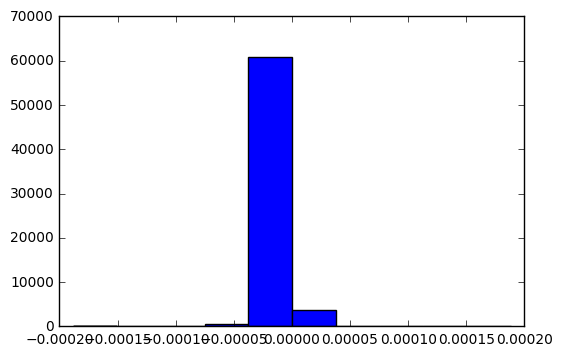

In [37]:
pricing = data.Open
returns = pricing.pct_change()[1:]

print('Skew:', stats.skew(returns))
print('Mean:', np.mean(returns))
print('Median:', np.median(returns))

plt.hist(returns, 10);
plt.show()

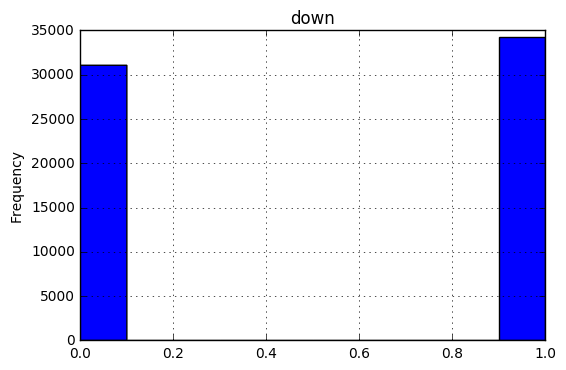

In [52]:
data['UD'].plot(kind='hist', grid=True, title='down')
plt.show()